In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
from scipy import stats
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel(r'C:\Users\HP\Documents\Loan_Default.xlsx')


In [3]:
loan_df = df.copy()

In [4]:
loan_df.head()

,ID,Gender,approv_in_adv,Credit_Worthiness,loan_amount,rate_of_interest,term,property_value,collateral,income,credit_type,Credit_Score,age,Region,Status
0,24890,Sex Not Available,nopre,l1,116500,NaN,360.0,118000.0,home,1740.0,EXP,758,25-34,south,1
1,24891,Male,nopre,l1,206500,NaN,360.0,NaN,home,4980.0,EQUI,552,55-64,North,1
2,24892,Male,pre,l1,406500,4.56,360.0,508000.0,home,9480.0,EXP,834,35-44,south,0
3,24893,Male,nopre,l1,456500,4.25,360.0,658000.0,home,11880.0,EXP,587,45-54,North,0
4,24894,Joint,pre,l1,696500,4.00,360.0,758000.0,home,10440.0,CRIF,602,25-34,North,0


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 148670 non-null  int64  
 1   Gender             148670 non-null  object 
 2   approv_in_adv      147762 non-null  object 
 3   Credit_Worthiness  148670 non-null  object 
 4   loan_amount        148670 non-null  int64  
 5   rate_of_interest   112231 non-null  float64
 6   term               148629 non-null  float64
 7   property_value     133572 non-null  float64
 8   collateral         148670 non-null  object 
 9   income             139520 non-null  float64
 10  credit_type        148670 non-null  object 
 11  Credit_Score       148670 non-null  int64  
 12  age                148470 non-null  object 
 13  Region             148670 non-null  object 
 14  Status             148670 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 17

Data Cleaning

In [6]:
loan_df.rename(columns={'Credit_Worthiness': 'credit_worthiness'}, inplace=True)

In [7]:
loan_df.rename(columns={'Credit_Score': 'credit_score'}, inplace = True)

In [8]:
loan_df.rename(columns={'Region' : 'region'}, inplace = True)
loan_df.rename(columns={'Status' : 'status'}, inplace = True)

In [9]:
loan_df.head()

,ID,Gender,approv_in_adv,credit_worthiness,loan_amount,rate_of_interest,term,property_value,collateral,income,credit_type,credit_score,age,region,status
0,24890,Sex Not Available,nopre,l1,116500,NaN,360.0,118000.0,home,1740.0,EXP,758,25-34,south,1
1,24891,Male,nopre,l1,206500,NaN,360.0,NaN,home,4980.0,EQUI,552,55-64,North,1
2,24892,Male,pre,l1,406500,4.56,360.0,508000.0,home,9480.0,EXP,834,35-44,south,0
3,24893,Male,nopre,l1,456500,4.25,360.0,658000.0,home,11880.0,EXP,587,45-54,North,0
4,24894,Joint,pre,l1,696500,4.00,360.0,758000.0,home,10440.0,CRIF,602,25-34,North,0


In [10]:

#convert to str

loan_df['ID'] = loan_df['ID'].astype(str)

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 148670 non-null  object 
 1   Gender             148670 non-null  object 
 2   approv_in_adv      147762 non-null  object 
 3   credit_worthiness  148670 non-null  object 
 4   loan_amount        148670 non-null  int64  
 5   rate_of_interest   112231 non-null  float64
 6   term               148629 non-null  float64
 7   property_value     133572 non-null  float64
 8   collateral         148670 non-null  object 
 9   income             139520 non-null  float64
 10  credit_type        148670 non-null  object 
 11  credit_score       148670 non-null  int64  
 12  age                148470 non-null  object 
 13  region             148670 non-null  object 
 14  status             148670 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 17

In [12]:
loan_df = loan_df.drop_duplicates(subset=['ID'], keep='first')


In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 148670 non-null  object 
 1   Gender             148670 non-null  object 
 2   approv_in_adv      147762 non-null  object 
 3   credit_worthiness  148670 non-null  object 
 4   loan_amount        148670 non-null  int64  
 5   rate_of_interest   112231 non-null  float64
 6   term               148629 non-null  float64
 7   property_value     133572 non-null  float64
 8   collateral         148670 non-null  object 
 9   income             139520 non-null  float64
 10  credit_type        148670 non-null  object 
 11  credit_score       148670 non-null  int64  
 12  age                148470 non-null  object 
 13  region             148670 non-null  object 
 14  status             148670 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 17

In [14]:
#in order not to loase so much data, we are going to fill columns with no interest rate with their mean
loan_df['rate_of_interest'].fillna(loan_df['rate_of_interest'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_1248\1006579262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['rate_of_interest'].fillna(loan_df['rate_of_interest'].mean(), inplace=True)


In [15]:
#drop te approv_in_adv column

loan_df.drop (columns = ['approv_in_adv'], inplace = True)

In [234]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 148670 non-null  object 
 1   Gender             148670 non-null  object 
 2   credit_worthiness  148670 non-null  object 
 3   loan_amount        148670 non-null  int64  
 4   rate_of_interest   148670 non-null  float64
 5   term               148629 non-null  float64
 6   property_value     133572 non-null  float64
 7   collateral         148670 non-null  object 
 8   income             139520 non-null  float64
 9   credit_type        148670 non-null  object 
 10  credit_score       148670 non-null  int64  
 11  age                148470 non-null  object 
 12  region             148670 non-null  object 
 13  status             148670 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 15.9+ MB


In [16]:
loan_df.loc[loan_df['property_value'].isna(), 'property_value'] = loan_df.groupby('collateral')['property_value'].transform('mean')


In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 148670 non-null  object 
 1   Gender             148670 non-null  object 
 2   credit_worthiness  148670 non-null  object 
 3   loan_amount        148670 non-null  int64  
 4   rate_of_interest   148670 non-null  float64
 5   term               148629 non-null  float64
 6   property_value     148670 non-null  float64
 7   collateral         148670 non-null  object 
 8   income             139520 non-null  float64
 9   credit_type        148670 non-null  object 
 10  credit_score       148670 non-null  int64  
 11  age                148470 non-null  object 
 12  region             148670 non-null  object 
 13  status             148670 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 15.9+ MB


In [18]:
loan_df = loan_df.dropna(subset='term')

In [19]:
loan_df = loan_df.dropna(subset='income')

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139479 entries, 0 to 148669
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 139479 non-null  object 
 1   Gender             139479 non-null  object 
 2   credit_worthiness  139479 non-null  object 
 3   loan_amount        139479 non-null  int64  
 4   rate_of_interest   139479 non-null  float64
 5   term               139479 non-null  float64
 6   property_value     139479 non-null  float64
 7   collateral         139479 non-null  object 
 8   income             139479 non-null  float64
 9   credit_type        139479 non-null  object 
 10  credit_score       139479 non-null  int64  
 11  age                139479 non-null  object 
 12  region             139479 non-null  object 
 13  status             139479 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 16.0+ MB


In [21]:
loan_df.describe(include='all')


,ID,Gender,credit_worthiness,loan_amount,rate_of_interest,term,property_value,collateral,income,credit_type,credit_score,age,region,status
count,139479,139479,139479,1.394790e+05,139479.000000,139479.000000,1.394790e+05,139479,139479.000000,139479,139479.000000,139479,139479,139479.000000
unique,139479,4,2,NaN,NaN,NaN,NaN,2,NaN,4,NaN,7,4,NaN
top,24890,Male,l1,NaN,NaN,NaN,NaN,home,NaN,CIB,NaN,45-54,North,NaN
freq,1,39772,133301,NaN,NaN,NaN,NaN,139449,NaN,45925,NaN,32663,70475,NaN
mean,NaN,NaN,NaN,3.290183e+05,4.079223,333.775658,5.022386e+05,NaN,6956.984922,NaN,699.876376,NaN,NaN,0.253694
std,NaN,NaN,NaN,1.845141e+05,0.470991,59.783367,3.472044e+05,NaN,6496.119920,NaN,115.833379,NaN,NaN,0.435126
min,NaN,NaN,NaN,1.650000e+04,0.000000,96.000000,1.800000e+04,NaN,0.000000,NaN,500.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.965000e+05,3.875000,360.000000,2.880000e+05,NaN,3720.000000,NaN,600.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,2.965000e+05,4.045476,360.000000,4.580000e+05,NaN,5760.000000,NaN,699.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,4.365000e+05,4.250000,360.000000,5.980000e+05,NaN,8520.000000,NaN,800.000000,NaN,NaN,1.000000


In [22]:
loan_df['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [23]:
loan_df = loan_df[loan_df['Gender'] != 'Sex Not Available']




In [24]:
loan_df['Gender'].unique()

array(['Male', 'Joint', 'Female'], dtype=object)

In [25]:
loan_df['status'].value_counts()

status
0    79375
1    25184
Name: count, dtype: int64

In [26]:
loan_df['status'].value_counts()

status
0    79375
1    25184
Name: count, dtype: int64

In [27]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [28]:
loan_df['collateral'].value_counts()

collateral
home    104535
land        24
Name: count, dtype: int64

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 104559 non-null  object 
 1   Gender             104559 non-null  object 
 2   credit_worthiness  104559 non-null  object 
 3   loan_amount        104559 non-null  int64  
 4   rate_of_interest   104559 non-null  float64
 5   term               104559 non-null  float64
 6   property_value     104559 non-null  float64
 7   collateral         104559 non-null  object 
 8   income             104559 non-null  float64
 9   credit_type        104559 non-null  object 
 10  credit_score       104559 non-null  int64  
 11  age                104559 non-null  object 
 12  region             104559 non-null  object 
 13  status             104559 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 12.0+ MB


EXPLORATORY DATA ANALYSIS

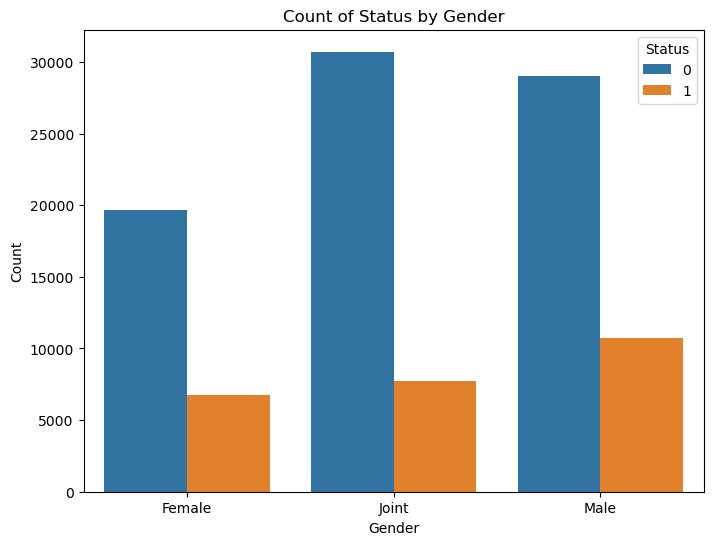

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each combination of Gender and Status
gender_status_counts = loan_df.groupby(['Gender', 'status']).size().reset_index(name='count')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_status_counts, x='Gender', y='count', hue='status')

# Customize plot
plt.title('Count of Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


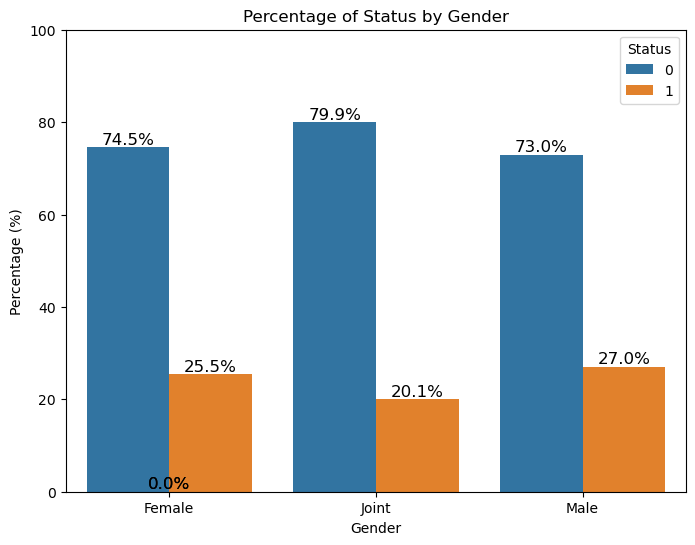

In [31]:

# Count occurrences of each Gender-Status combination
gender_status_counts = loan_df.groupby(['Gender', 'status']).size().reset_index(name='count')

# Calculate total counts per Gender
total_per_gender = gender_status_counts.groupby('Gender')['count'].transform('sum')

# Compute percentage
gender_status_counts['percentage'] = (gender_status_counts['count'] / total_per_gender) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=gender_status_counts, x='Gender', y='percentage', hue='status')

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Format as percentage
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12, color='black')

# Customize plot
plt.title('Percentage of Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Status')
plt.ylim(0, 100)  # Set y-axis from 0 to 100%

# Show plot
plt.show()


In [ ]:
#there is no real significant difference between genders, each gender has a no default rate of between 70-80%

In [32]:
loan_df['credit_worthiness'].value_counts()

credit_worthiness
l1    99910
l2     4649
Name: count, dtype: int64

In [33]:
loan_df['loan_amount'].mean()


341367.5867213726

C:\Users\HP\AppData\Local\Temp\ipykernel_1248\2593143655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=status_loan_mean, x='status', y='loan_amount', palette='Blues')


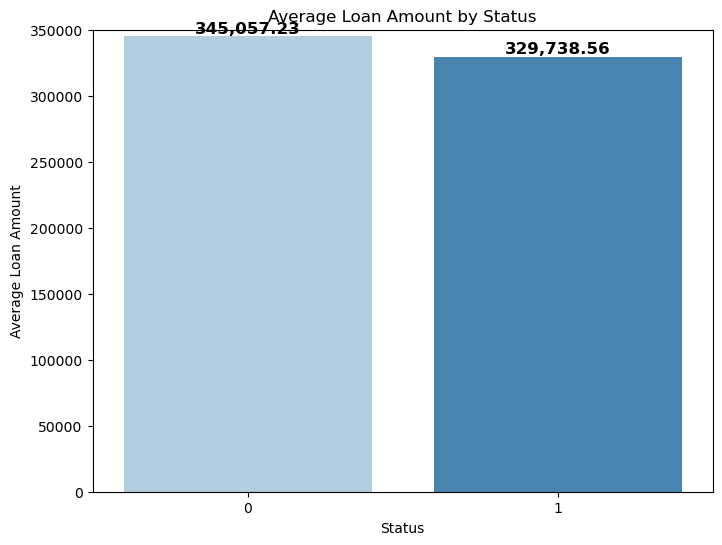

In [34]:

status_loan_mean = loan_df.groupby('status', as_index=False)['loan_amount'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=status_loan_mean, x='status', y='loan_amount', palette='Blues')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize plot
plt.title('Average Loan Amount by Status')
plt.xlabel('Status')
plt.ylabel('Average Loan Amount')
plt.ylim(0, status_loan_mean['loan_amount'].max() + 5000)  # Adjust spacing on y-axis
plt.xticks(rotation=0)
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_1248\999039718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=status_property_mean, x='status', y='property_value', palette='Greens')


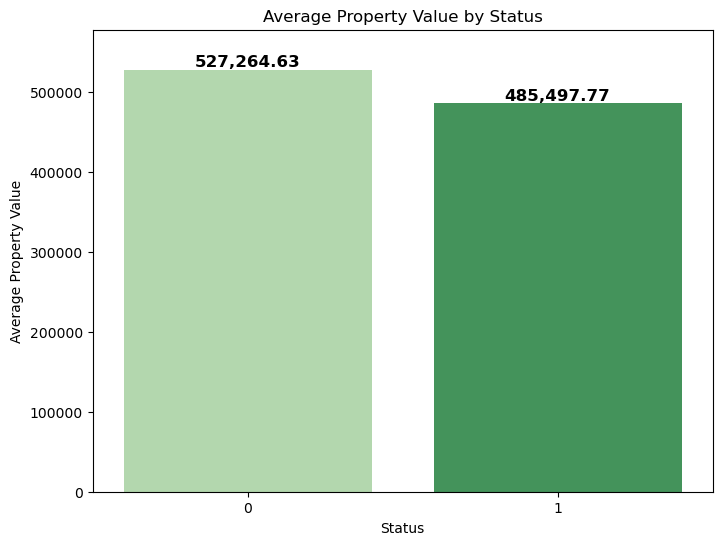

In [35]:

# Compute mean Property Value per status
status_property_mean = loan_df.groupby('status', as_index=False)['property_value'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=status_property_mean, x='status', y='property_value', palette='Greens')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize plot
plt.title('Average Property Value by Status')
plt.xlabel('Status')
plt.ylabel('Average Property Value')
plt.ylim(0, status_property_mean['property_value'].max() + 50000)  # Adjust y-axis for spacing
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1248\1617150562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=status_credit_mean, x='status', y='credit_score', palette='Purples')


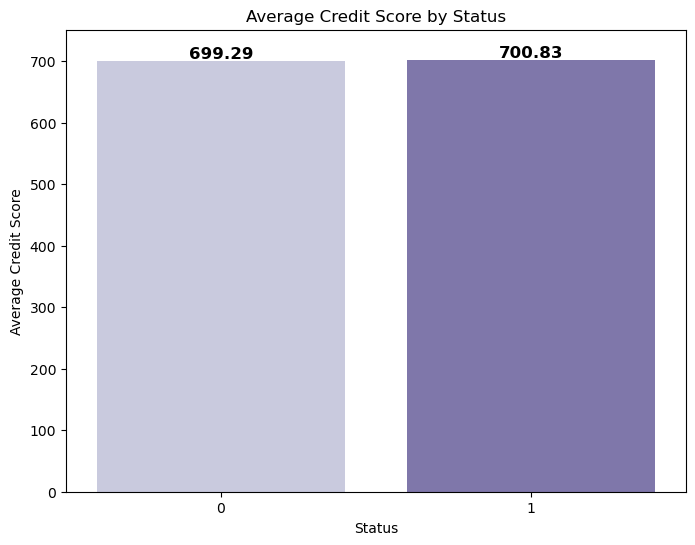

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean credit score per status
status_credit_mean = loan_df.groupby('status', as_index=False)['credit_score'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=status_credit_mean, x='status', y='credit_score', palette='Purples')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize plot
plt.title('Average Credit Score by Status')
plt.xlabel('Status')
plt.ylabel('Average Credit Score')
plt.ylim(0, status_credit_mean['credit_score'].max() + 50)  # Adjust y-axis for spacing
plt.xticks(rotation=0)
plt.show()


In [ ]:
#using one-hot encoding for the categorical columns 

In [37]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 104559 non-null  object 
 1   Gender             104559 non-null  object 
 2   credit_worthiness  104559 non-null  object 
 3   loan_amount        104559 non-null  int64  
 4   rate_of_interest   104559 non-null  float64
 5   term               104559 non-null  float64
 6   property_value     104559 non-null  float64
 7   collateral         104559 non-null  object 
 8   income             104559 non-null  float64
 9   credit_type        104559 non-null  object 
 10  credit_score       104559 non-null  int64  
 11  age                104559 non-null  object 
 12  region             104559 non-null  object 
 13  status             104559 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 12.0+ MB


In [57]:
loan_df1 = loan_df.copy()

In [58]:

# List of categorical columns to encode
categorical_cols = ['Gender', 'credit_worthiness', 'collateral', 'credit_type', 'region']

# One-Hot Encode categorical columns
loan_df1 = pd.get_dummies(loan_df, columns=categorical_cols, drop_first=False)

one_hot_cols = [col for col in loan_df1.columns if any(orig_col in col for orig_col in categorical_cols)]
loan_df1[one_hot_cols] = loan_df1[one_hot_cols].astype(int)




In [59]:
loan_df1.head()

,ID,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,Gender_Female,...,collateral_home,collateral_land,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,region_North,region_North-East,region_central,region_south
1,24891,206500,4.045476,360.0,4.979489e+05,4980.0,552,55-64,1,0,...,1,0,0,0,1,0,1,0,0,0
2,24892,406500,4.560000,360.0,5.080000e+05,9480.0,834,35-44,0,0,...,1,0,0,0,0,1,0,0,0,1
3,24893,456500,4.250000,360.0,6.580000e+05,11880.0,587,45-54,0,0,...,1,0,0,0,0,1,1,0,0,0
4,24894,696500,4.000000,360.0,7.580000e+05,10440.0,602,25-34,0,0,...,1,0,0,1,0,0,1,0,0,0
5,24895,706500,3.990000,360.0,1.008000e+06,10080.0,864,35-44,0,0,...,1,0,0,0,0,1,1,0,0,0


In [60]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    104559 non-null  object 
 1   loan_amount           104559 non-null  int64  
 2   rate_of_interest      104559 non-null  float64
 3   term                  104559 non-null  float64
 4   property_value        104559 non-null  float64
 5   income                104559 non-null  float64
 6   credit_score          104559 non-null  int64  
 7   age                   104559 non-null  object 
 8   status                104559 non-null  int64  
 9   Gender_Female         104559 non-null  int32  
 10  Gender_Joint          104559 non-null  int32  
 11  Gender_Male           104559 non-null  int32  
 12  credit_worthiness_l1  104559 non-null  int32  
 13  credit_worthiness_l2  104559 non-null  int32  
 14  collateral_home       104559 non-null  int32  
 15  colla

In [61]:
columns_to_drop = ['ID', 'credit_worthiness_l2', 'collateral_land']

# Drop specified columns safely (ignores errors if columns don't exist)
loan_df1 = loan_df1.drop(columns=columns_to_drop, errors='ignore')



In [62]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           104559 non-null  int64  
 1   rate_of_interest      104559 non-null  float64
 2   term                  104559 non-null  float64
 3   property_value        104559 non-null  float64
 4   income                104559 non-null  float64
 5   credit_score          104559 non-null  int64  
 6   age                   104559 non-null  object 
 7   status                104559 non-null  int64  
 8   Gender_Female         104559 non-null  int32  
 9   Gender_Joint          104559 non-null  int32  
 10  Gender_Male           104559 non-null  int32  
 11  credit_worthiness_l1  104559 non-null  int32  
 12  collateral_home       104559 non-null  int32  
 13  credit_type_CIB       104559 non-null  int32  
 14  credit_type_CRIF      104559 non-null  int32  
 15  credi

In [63]:
loan_df1['age'].value_counts()

age
45-54    24604
35-44    23847
55-64    22231
25-34    14588
65-74    13615
>74       4619
<25       1055
Name: count, dtype: int64

In [64]:
# Define the mapping for age categories
age_mapping = {
    '45-54': 4,
    '35-44': 3,
    '55-64': 5,
    '25-34': 2,
    '65-74': 6,
    '>74': 7,
    '<25': 1
}

# Apply mapping to the 'age' column
loan_df1['age'] = loan_df1['age'].replace(age_mapping)


C:\Users\HP\AppData\Local\Temp\ipykernel_1248\974977375.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df1['age'] = loan_df1['age'].replace(age_mapping)


In [65]:
loan_df1

,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,Gender_Female,Gender_Joint,...,credit_worthiness_l1,collateral_home,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,region_North,region_North-East,region_central,region_south
1,206500,4.045476,360.0,4.979489e+05,4980.0,552,5,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,406500,4.560000,360.0,5.080000e+05,9480.0,834,3,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3,456500,4.250000,360.0,6.580000e+05,11880.0,587,4,0,0,0,...,1,1,0,0,0,1,1,0,0,0
4,696500,4.000000,360.0,7.580000e+05,10440.0,602,2,0,0,1,...,1,1,0,1,0,0,1,0,0,0
5,706500,3.990000,360.0,1.008000e+06,10080.0,864,3,0,0,1,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148664,156500,3.990000,360.0,1.580000e+05,4020.0,859,6,0,0,1,...,1,1,0,0,0,1,0,0,1,0
148666,586500,5.190000,360.0,7.880000e+05,7140.0,569,2,0,0,0,...,1,1,1,0,0,0,0,0,0,1
148667,446500,3.125000,180.0,7.280000e+05,6900.0,702,4,0,0,0,...,1,1,1,0,0,0,1,0,0,0
148668,196500,3.500000,180.0,2.780000e+05,7140.0,737,5,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [66]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           104559 non-null  int64  
 1   rate_of_interest      104559 non-null  float64
 2   term                  104559 non-null  float64
 3   property_value        104559 non-null  float64
 4   income                104559 non-null  float64
 5   credit_score          104559 non-null  int64  
 6   age                   104559 non-null  int64  
 7   status                104559 non-null  int64  
 8   Gender_Female         104559 non-null  int32  
 9   Gender_Joint          104559 non-null  int32  
 10  Gender_Male           104559 non-null  int32  
 11  credit_worthiness_l1  104559 non-null  int32  
 12  collateral_home       104559 non-null  int32  
 13  credit_type_CIB       104559 non-null  int32  
 14  credit_type_CRIF      104559 non-null  int32  
 15  credi

In [67]:
loan_df1['status'].value_counts()

status
0    79375
1    25184
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

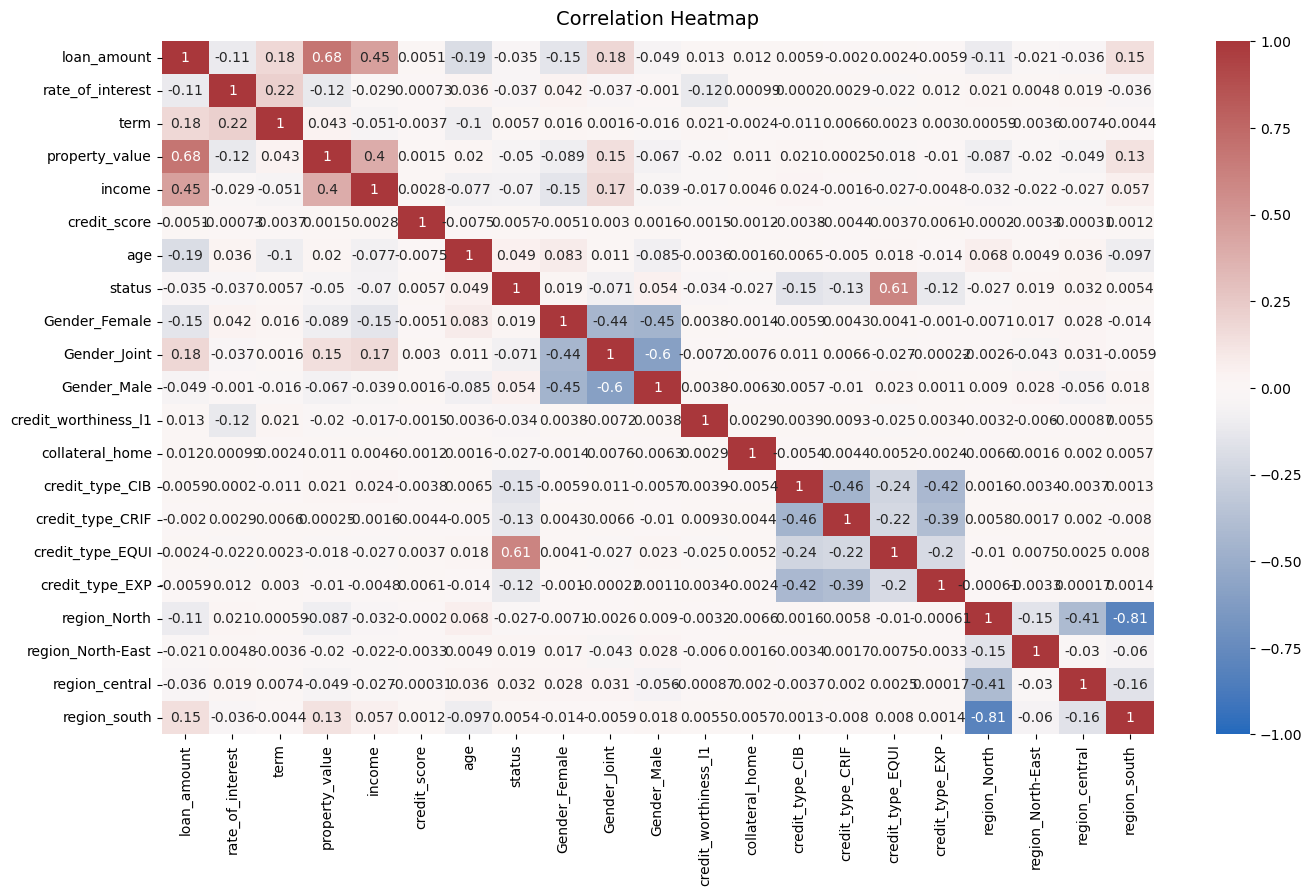

In [68]:
# Select only numeric columns
numeric_columns = loan_df1.select_dtypes(include='number')

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [69]:
# the property_value and loan amount are highly correlted because the loan amount will determine the value of collateral that is needed.

#dropping the property value column

loan_df2 = loan_df1.drop(columns='property_value', errors='ignore')



In [71]:
#also drop the Gender_female column so the data only has male(yes or no) and joint: signifying if the obligor is a single person or a group

loan_df2 = loan_df2.drop(columns='Gender_Female', errors='ignore')

In [72]:
loan_df2.rename(columns={'Gender_Male': 'male', 'Gender_Joint': 'joint_obligor'}, inplace=True)




In [73]:
loan_df2.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,joint_obligor,male,credit_worthiness_l1,collateral_home,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,region_North,region_North-East,region_central,region_south
1,206500,4.045476,360.0,4.979489e+05,4980.0,552,5,1,0,1,1,1,0,0,1,0,1,0,0,0
2,406500,4.560000,360.0,5.080000e+05,9480.0,834,3,0,0,1,1,1,0,0,0,1,0,0,0,1
3,456500,4.250000,360.0,6.580000e+05,11880.0,587,4,0,0,1,1,1,0,0,0,1,1,0,0,0
4,696500,4.000000,360.0,7.580000e+05,10440.0,602,2,0,1,0,1,1,0,1,0,0,1,0,0,0
5,706500,3.990000,360.0,1.008000e+06,10080.0,864,3,0,1,0,1,1,0,0,0,1,1,0,0,0


In [74]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           104559 non-null  int64  
 1   rate_of_interest      104559 non-null  float64
 2   term                  104559 non-null  float64
 3   property_value        104559 non-null  float64
 4   income                104559 non-null  float64
 5   credit_score          104559 non-null  int64  
 6   age                   104559 non-null  int64  
 7   status                104559 non-null  int64  
 8   joint_obligor         104559 non-null  int32  
 9   male                  104559 non-null  int32  
 10  credit_worthiness_l1  104559 non-null  int32  
 11  collateral_home       104559 non-null  int32  
 12  credit_type_CIB       104559 non-null  int32  
 13  credit_type_CRIF      104559 non-null  int32  
 14  credit_type_EQUI      104559 non-null  int32  
 15  credi

In [75]:
# Isolate target variable (y)
y = loan_df2['status']

# Isolate the features (X)
X = loan_df2.drop('status', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Building a decision tree

In [80]:
#Decision Tree model

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {'max_depth': [6, 8],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 4]}

# Define scoring metrics as a dictionary
scoring = {'recall': 'recall',
           'roc_auc': 'roc_auc',
           'precision': 'precision',
           'accuracy': 'accuracy',
           'f1': 'f1'}

# Use 'recall' as the refit metric to minimize missed defaulters
tree1 = GridSearchCV(tree, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')


#refitting with recall help us reduce the false negatives as having many defaulters can be costly

In [78]:
y.value_counts()

status
0    79375
1    25184
Name: count, dtype: int64

In [81]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 6.28 s
Wall time: 7.13 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [82]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [83]:
# Check best AUC score on CV
tree1.best_score_

1.0

In [84]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [85]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.999947,1.0,0.999974,0.999987,0.999992


In [89]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {
    'max_depth': [3, 5], 
    'max_features': [0.7, 1.0],
    'max_samples': [0.8, 1.0],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [100],
}  

# Define scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV with proper scoring format
rf1 = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')

In [90]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 10min 29s
Wall time: 11min 2s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [0.7, 1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [91]:
# Examine best score
rf1.best_score_

1.0

In [92]:
rf1.best_params_

{'max_depth': 3,
 'max_features': 0.7,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [93]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision  recall        F1  accuracy       auc
0  decision tree cv   0.999947     1.0  0.999974  0.999987  0.999992
              model  precision  recall        F1  accuracy  auc
0  random forest cv   0.999947     1.0  0.999974  0.999987  1.0


# Feature Engineering

In [182]:
loan_df3 = loan_df2.copy()

In [183]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           104559 non-null  int64  
 1   rate_of_interest      104559 non-null  float64
 2   term                  104559 non-null  float64
 3   property_value        104559 non-null  float64
 4   income                104559 non-null  float64
 5   credit_score          104559 non-null  int64  
 6   age                   104559 non-null  int64  
 7   status                104559 non-null  int64  
 8   joint_obligor         104559 non-null  int32  
 9   male                  104559 non-null  int32  
 10  credit_worthiness_l1  104559 non-null  int32  
 11  collateral_home       104559 non-null  int32  
 12  credit_type_CIB       104559 non-null  int32  
 13  credit_type_CRIF      104559 non-null  int32  
 14  credit_type_EQUI      104559 non-null  int32  
 15  credi

In [184]:
# create a column for debt to income ratio. This measures borrower’s debt burden compared to their income.

loan_df3['debt_to_income'] = loan_df3['loan_amount'] / loan_df3['income']


In [185]:
# create a column for loan to value retio. This measures how much loan covers property value.

loan_df3['loan_to_value'] = loan_df3['loan_amount'] / loan_df3['property_value']


In [186]:
# create interest rate to credit score ratio. This captures how bad a borrower’s interest rate is relative to their credit score.
#If two people have 7% interest, but one has a 750 credit score and the other has 600, the 600-score borrower is riskier.

loan_df3['interest_credit_ratio'] = loan_df3['rate_of_interest'] / loan_df3['credit_score']



In [187]:
#create a column for simple inteerest

loan_df3['simple_interest'] = (loan_df3['loan_amount'] * loan_df3['rate_of_interest'] * loan_df3['term']) / 100


In [188]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amount            104559 non-null  int64  
 1   rate_of_interest       104559 non-null  float64
 2   term                   104559 non-null  float64
 3   property_value         104559 non-null  float64
 4   income                 104559 non-null  float64
 5   credit_score           104559 non-null  int64  
 6   age                    104559 non-null  int64  
 7   status                 104559 non-null  int64  
 8   joint_obligor          104559 non-null  int32  
 9   male                   104559 non-null  int32  
 10  credit_worthiness_l1   104559 non-null  int32  
 11  collateral_home        104559 non-null  int32  
 12  credit_type_CIB        104559 non-null  int32  
 13  credit_type_CRIF       104559 non-null  int32  
 14  credit_type_EQUI       104559 non-null  i

In [189]:
loan_df4 = loan_df3.drop(columns = ['loan_amount','rate_of_interest','term','property_value','income','credit_score','collateral_home']) 

In [190]:
loan_df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    104559 non-null  int64  
 1   status                 104559 non-null  int64  
 2   joint_obligor          104559 non-null  int32  
 3   male                   104559 non-null  int32  
 4   credit_worthiness_l1   104559 non-null  int32  
 5   credit_type_CIB        104559 non-null  int32  
 6   credit_type_CRIF       104559 non-null  int32  
 7   credit_type_EQUI       104559 non-null  int32  
 8   credit_type_EXP        104559 non-null  int32  
 9   region_North           104559 non-null  int32  
 10  region_North-East      104559 non-null  int32  
 11  region_central         104559 non-null  int32  
 12  region_south           104559 non-null  int32  
 13  debt_to_income         104559 non-null  float64
 14  loan_to_value          104559 non-null  f

In [191]:
loan_df4 = loan_df4.drop(columns = ['male','credit_worthiness_l1'])

In [192]:
loan_df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    104559 non-null  int64  
 1   status                 104559 non-null  int64  
 2   joint_obligor          104559 non-null  int32  
 3   credit_type_CIB        104559 non-null  int32  
 4   credit_type_CRIF       104559 non-null  int32  
 5   credit_type_EQUI       104559 non-null  int32  
 6   credit_type_EXP        104559 non-null  int32  
 7   region_North           104559 non-null  int32  
 8   region_North-East      104559 non-null  int32  
 9   region_central         104559 non-null  int32  
 10  region_south           104559 non-null  int32  
 11  debt_to_income         104559 non-null  float64
 12  loan_to_value          104559 non-null  float64
 13  interest_credit_ratio  104559 non-null  float64
 14  simple_interest        104559 non-null  f

Text(0.5, 1.0, 'Correlation Heatmap')

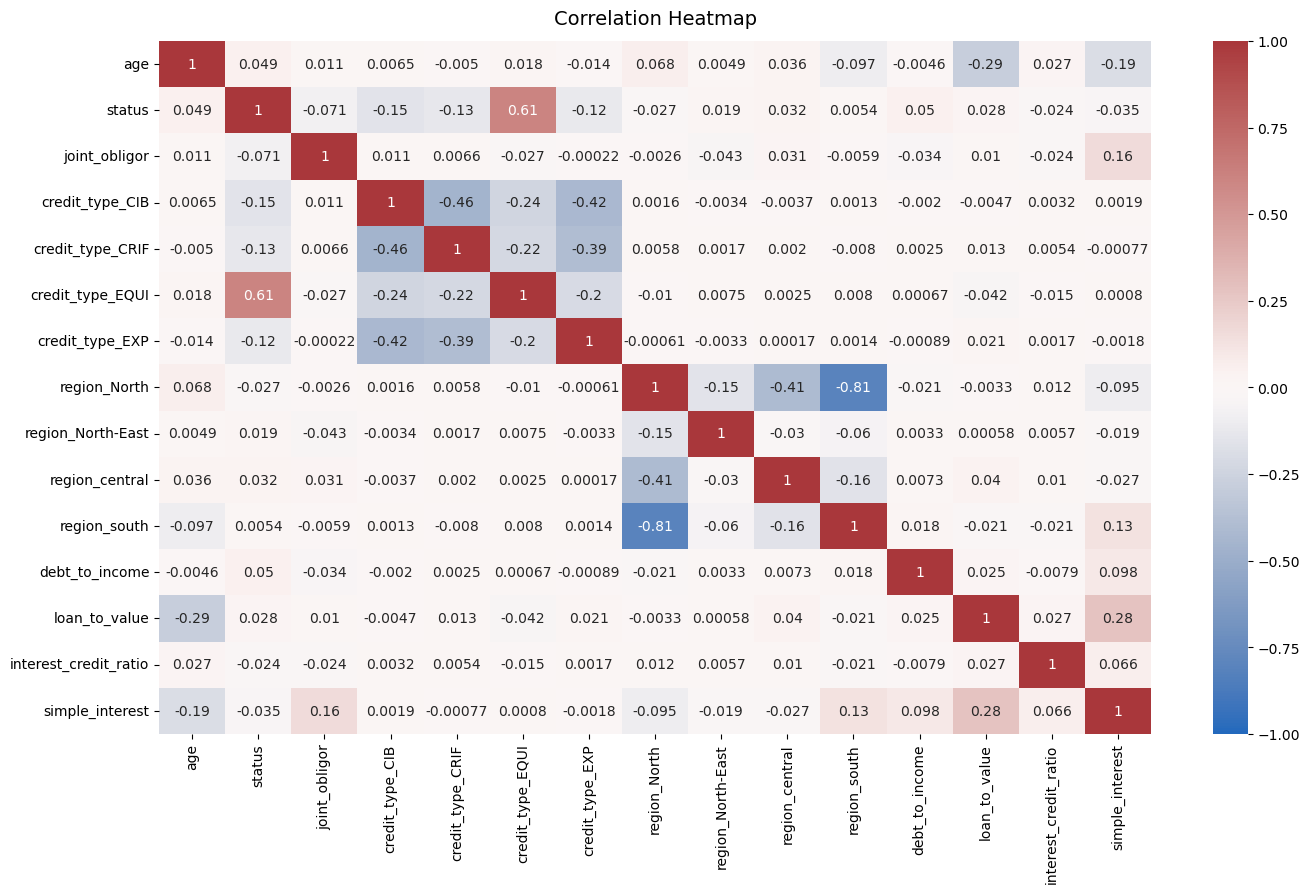

In [193]:
# Select only numeric columns
numeric_columns = loan_df4.select_dtypes(include='number')

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [195]:
loan_df4.describe()

,age,status,joint_obligor,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,region_North,region_North-East,region_central,region_south,debt_to_income,loan_to_value,interest_credit_ratio,simple_interest
count,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,1.045590e+05,104559.000000,104559.000000,1.045590e+05
mean,4.068191,0.240859,0.367458,0.333008,0.297985,0.104152,0.264855,0.668407,0.010865,0.075938,0.244790,inf,0.715567,0.005994,4.734996e+06
std,1.415409,0.427607,0.482115,0.471292,0.457375,0.305459,0.441258,0.470788,0.103666,0.264900,0.429965,NaN,0.221451,0.001244,2.850737e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.992573e-01,0.009675,0.002645,2.135250e+05
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.801370e+01,0.587090,0.005024,2.618343e+06
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.341270e+01,0.741597,0.005821,4.258926e+06
75%,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.122595e+01,0.855903,0.006826,6.348825e+06
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,5.274637,0.013333,5.208712e+07


In [197]:
#we have some infinite and NaN values

# Convert 'inf' and '-inf' to NaN
loan_df4.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numeric columns to compute the mean
numeric_cols = loan_df4.select_dtypes(include=[np.number]).columns

# Fill NaN values (including those from 'inf') with the column mean
loan_df4[numeric_cols] = loan_df4[numeric_cols].apply(lambda x: x.fillna(x.mean()))


In [198]:
loan_df4.describe()

,age,status,joint_obligor,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,region_North,region_North-East,region_central,region_south,debt_to_income,loan_to_value,interest_credit_ratio,simple_interest
count,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,104559.000000,1.045590e+05
mean,4.068191,0.240859,0.367458,0.333008,0.297985,0.104152,0.264855,0.668407,0.010865,0.075938,0.244790,57.392392,0.715567,0.005994,4.734996e+06
std,1.415409,0.427607,0.482115,0.471292,0.457375,0.305459,0.441258,0.470788,0.103666,0.264900,0.429965,105.224970,0.221451,0.001244,2.850737e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.599257,0.009675,0.002645,2.135250e+05
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.013699,0.587090,0.005024,2.618343e+06
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,53.412698,0.741597,0.005821,4.258926e+06
75%,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,70.502646,0.855903,0.006826,6.348825e+06
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25275.000000,5.274637,0.013333,5.208712e+07


In [199]:
# Isolate target variable (y)
y = loan_df4['status']

# Isolate the features (X)
X = loan_df4.drop('status', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104559 entries, 1 to 148669
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    104559 non-null  int64  
 1   joint_obligor          104559 non-null  int32  
 2   credit_type_CIB        104559 non-null  int32  
 3   credit_type_CRIF       104559 non-null  int32  
 4   credit_type_EQUI       104559 non-null  int32  
 5   credit_type_EXP        104559 non-null  int32  
 6   region_North           104559 non-null  int32  
 7   region_North-East      104559 non-null  int32  
 8   region_central         104559 non-null  int32  
 9   region_south           104559 non-null  int32  
 10  debt_to_income         104559 non-null  float64
 11  loan_to_value          104559 non-null  float64
 12  interest_credit_ratio  104559 non-null  float64
 13  simple_interest        104559 non-null  float64
dtypes: float64(4), int32(9), int64(1)
memory 

# Build a second decision tree

In [201]:
#Decision Tree model

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {'max_depth': [6, 8],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 4]}

# Define scoring metrics as a dictionary
scoring = {'recall': 'recall',
           'roc_auc': 'roc_auc',
           'precision': 'precision',
           'accuracy': 'accuracy',
           'f1': 'f1'}

# Use 'recall' as the refit metric to minimize missed defaulters
tree2 = GridSearchCV(tree, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')



In [202]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 12.2 s
Wall time: 13.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [203]:
# Check best parameters
tree2.best_params_


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [204]:

# Check best AUC score on CV
tree2.best_score_

0.49205844980940283

In [205]:

tree2_cv_results = make_results('decision tree cv', tree2, 'auc')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.982541,0.491423,0.655157,0.8754,0.834937


In [211]:
#Decision Tree model

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {'max_depth': [5, 10, 15],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [2, 4, 6]}

# Define scoring metrics as a dictionary
scoring = {'recall': 'recall',
           'roc_auc': 'roc_auc',
           'precision': 'precision',
           'accuracy': 'accuracy',
           'f1': 'f1'}

# Use 'recall' as the refit metric to minimize missed defaulters
tree3 = GridSearchCV(tree, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')



In [212]:
%%time
tree3.fit(X_train, y_train)

CPU times: total: 40.5 s
Wall time: 42.9 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [214]:
# Check best parameters
tree3.best_params_


{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [215]:
# Check best AUC score on CV
tree3.best_score_

0.5614675984752223

In [216]:
#Decision Tree model

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
cv_params = cv_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', None] 
}
# Define scoring metrics as a dictionary
scoring = {'recall': 'recall',
           'roc_auc': 'roc_auc',
           'precision': 'precision',
           'accuracy': 'accuracy',
           'f1': 'f1'}

# Use 'recall' as the refit metric to minimize missed defaulters
tree4 = GridSearchCV(tree, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')



In [217]:
%%time
tree4.fit(X_train, y_train)

CPU times: total: 2min 41s
Wall time: 3min 23s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [218]:
# Check best parameters
tree4.best_params_


{'class_weight': 'balanced',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [219]:
# Check best AUC score on CV
tree4.best_score_

0.8301037695891571

In [220]:
tree4_cv_results = make_results('decision tree cv', tree4, 'auc')
tree4_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.71583,0.820574,0.764608,0.878295,0.902477


In [232]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {
    'max_depth': [3, 5], 
    'max_features': [0.7, 1.0],
    'max_samples': [0.8, 1.0],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [100],
}  

# Define scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV with proper scoring format
rf1 = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')

In [230]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 16min 39s
Wall time: 18min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [0.7, 1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [231]:
# Examine best score
rf2 .best_score_

0.4864464210080474

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
cv_params = {
    'max_depth': [5], 
    'max_features': [0.7],  
    'max_samples': [0.7],  
    'min_samples_leaf': [1],  
    'min_samples_split': [2],  
    'n_estimators': [150]  
}  

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Use GridSearchCV since we have a fixed parameter set
rf3 = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=4, refit='recall')



In [238]:
# Fit model
rf3.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [0.7],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [150]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [239]:
# Examine best score
rf3 .best_score_

0.4861817026683609

In [240]:
# Define Model with Class Weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define Hyperparameter Grid (Optimized for Recall)
cv_params = {
    'n_estimators': [100, 150],         
    'max_depth': [3, 5],                    
    'max_features': ['sqrt', 0.5],          
    'max_samples': [0.8, 1.0],             
    'min_samples_split': [2, 5],            
    'min_samples_leaf': [1, 2],             
}

# Define Scoring Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# RandomizedSearchCV 
rf4 = RandomizedSearchCV(
    rf, 
    param_distributions=cv_params, 
    scoring=scoring, 
    cv=4, 
    refit='recall',  # Optimizing for recall
    n_iter=10,  # Limits the number of parameter combinations (faster)
    random_state=42,
    n_jobs=-1
)


In [241]:
# Fit model
rf4.fit(X_train, y_train)


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5],
                                        'max_features': ['sqrt', 0.5],
                                        'max_samples': [0.8, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   random_state=42, refit='recall',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1',
                            'precision': 'precision', 'recall': 'recall',
                            'roc_auc': 'roc_auc'})

In [242]:
# Examine best score
rf4 .best_score_

0.5011647606946209

In [243]:
# Define Model with Balanced Weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

# Define Optimized Hyperparameter Grid
cv_params = {
    'n_estimators': [100, 200],            
    'max_depth': [5, 10],                 
    'max_features': ['log2', 0.5],          
    'max_samples': [0.8, 0.9],             
    'min_samples_split': [5, 10],           
    'min_samples_leaf': [1, 2],             
}

# Define Scoring Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Use RandomizedSearchCV for Faster Optimization
rf5 = RandomizedSearchCV(
    rf, 
    param_distributions=cv_params, 
    scoring=scoring, 
    cv=4, 
    refit='recall',  # Optimizing for recall
    n_iter=15,  # Increased iterations for better optimization
    random_state=42,
    n_jobs=-1
)


In [244]:
# Fit model
rf5.fit(X_train, y_train)


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['log2', 0.5],
                                        'max_samples': [0.8, 0.9],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, refit='recall',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1',
                            'precision': 'precision', 'recall': 'recall',
                            'roc_auc': 'roc_auc'})

In [245]:
# Examine best score
rf5 .best_score_

0.608163913595934

In [259]:

# Define Model with Balanced Weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')


param_space = {
    'n_estimators': [300, 400, 500],       
    'max_depth': [None, 15, 20],           
    'max_features': ['sqrt', 0.5],          
    'max_samples': [0.7, 0.8, 1.0],        
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 5],         
    'criterion': ['gini', 'entropy'],      
}

# Define Scoring Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate RandomizedSearchCV (Corrected)
rf6 = RandomizedSearchCV(
    rf, 
    param_distributions=param_space, 
    scoring=scoring, 
    cv=5,               
    refit='recall',     
    n_iter=50,          
    random_state=42,
    n_jobs=-1
)


In [260]:

# Fit model
rf6.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 15, 20],
                                        'max_features': ['sqrt', 0.5],
                                        'max_samples': [0.7, 0.8, 1.0],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 400, 500]},
                   random_state=42, refit='recall',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1',
                            'precision': 'precision', 'recall': 'recall',
                            'roc_auc': 'roc_auc'})

In [261]:
##### Examine best score
rf6 .best_score_

0.6490898003056308

In [262]:
# Call 'make_results()' on the GridSearch object
rf6_cv_results = make_results('random forest cv', rf6, 'auc')
rf6_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.944008,0.573539,0.713535,0.889083,0.921928


In [263]:
print(tree1_cv_results)
print(rf1_cv_results)
print(tree4_cv_results)
print(rf6_cv_results)

              model  precision  recall        F1  accuracy       auc
0  decision tree cv   0.999947     1.0  0.999974  0.999987  0.999992
              model  precision  recall        F1  accuracy  auc
0  random forest cv   0.999947     1.0  0.999974  0.999987  1.0
              model  precision    recall        F1  accuracy       auc
0  decision tree cv    0.71583  0.820574  0.764608  0.878295  0.902477
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.944008  0.573539  0.713535  0.889083  0.921928


Based on recall, decision tree4 is the better model as our focus is recall. Recall measures how many actual defaulters (1s) you correctly identified. A high recall means you are catching most of the defaulters. and we don't lend to people who will likely default.


In [264]:
# Get predictions from tree1 on test data
tree_preds = tree4.predict(X_test)

In [265]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Calculate key metrics
precision = precision_score(y_test, tree_preds)
recall = recall_score(y_test, tree_preds)
f1 = f1_score(y_test, tree_preds)
accuracy = accuracy_score(y_test, tree_preds)

# For AUC, you need probability estimates (if tree1 supports predict_proba)
if hasattr(tree4, "predict_proba"):
    auc = roc_auc_score(y_test, tree4.predict_proba(X_test)[:, 1])
else:
    auc = None  # If the model doesn't support predict_proba

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
if auc is not None:
    print(f"AUC: {auc:.4f}")
else:
    print("AUC is not available for this model.")

Accuracy: 0.8959
Precision: 0.7461
Recall: 0.8607
F1 Score: 0.7993
AUC: 0.9191


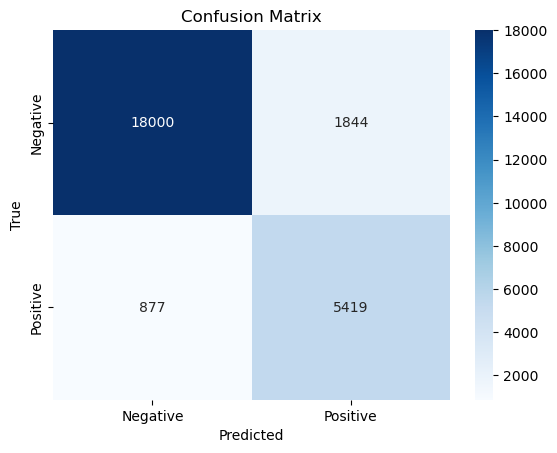

In [266]:
cm = confusion_matrix(y_test, tree_preds)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

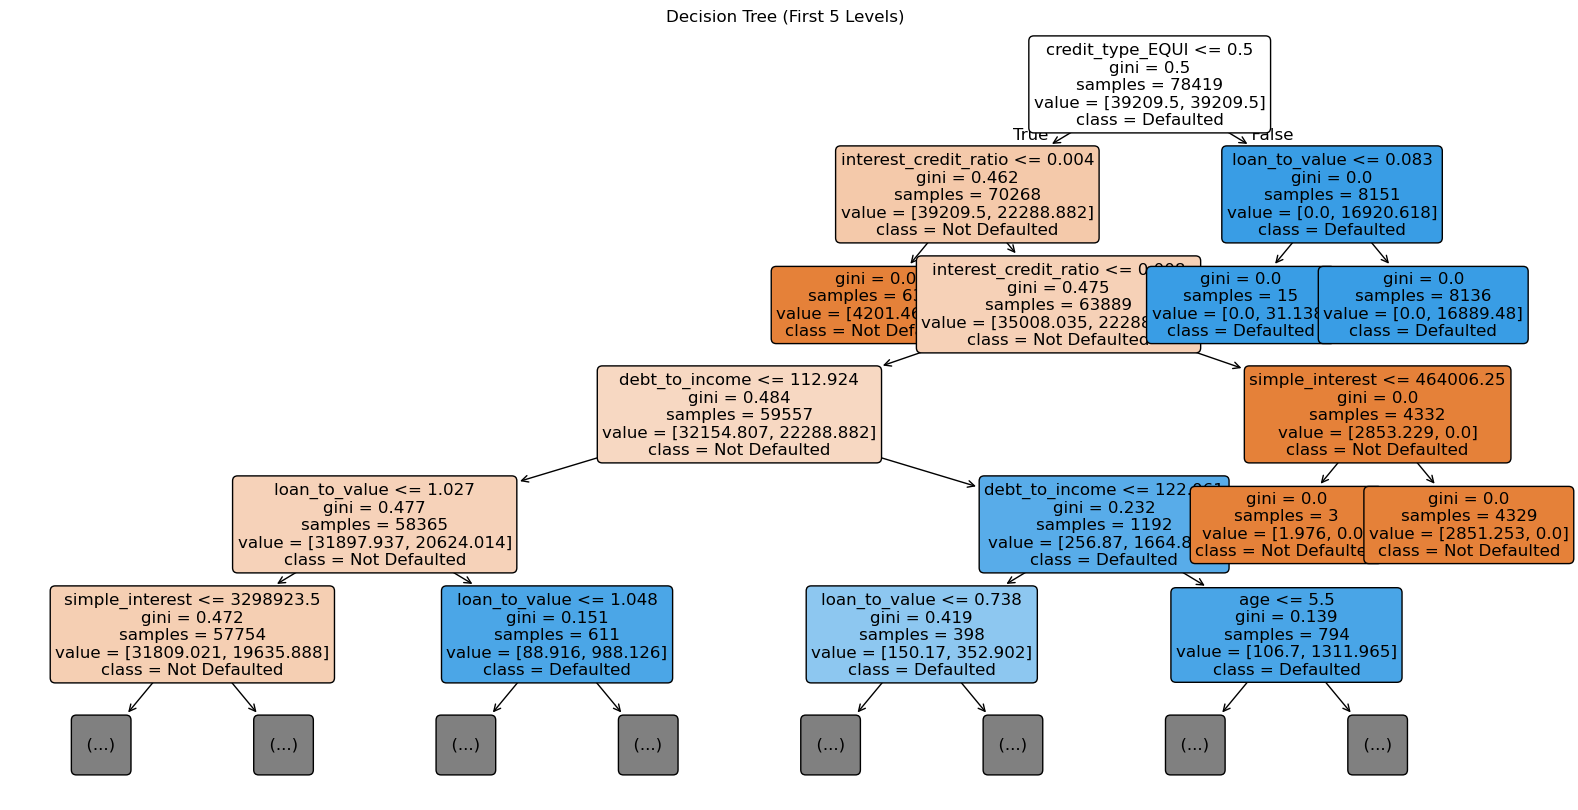

In [271]:
from sklearn.tree import plot_tree  

best_tree = tree4.best_estimator_


plt.figure(figsize=(20, 10))  
plot_tree(best_tree, filled=True, feature_names=X_train.columns, 
          class_names=['Not Defaulted', 'Defaulted'], rounded=True, fontsize=12, 
          max_depth=5)  
plt.title("Decision Tree (First 5 Levels)")
plt.show()


In [272]:
tree4_importances = pd.DataFrame(tree4.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )

# Sort feature importances in descending order
tree4_importances = tree4_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree4_importances = tree4_importances[tree4_importances['gini_importance'] != 0]

# Display the sorted feature importances
tree4_importances

,gini_importance
simple_interest,0.429200
credit_type_EQUI,0.300239
interest_credit_ratio,0.100057
debt_to_income,0.071563
loan_to_value,0.070376
age,0.011682
credit_type_EXP,0.003190
joint_obligor,0.003073
credit_type_CRIF,0.002586
region_south,0.002253
